### Nom : TAZZI karim

In [25]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
logging.getLogger().setLevel('INFO')

## Helpers

In [26]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [27]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Your work

In [28]:
df_atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#info of the dataframe
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         52298 non-null  int64         
 1   Location    52298 non-null  object        
 2   Tournament  52298 non-null  object        
 3   Date        52298 non-null  datetime64[ns]
 4   Series      52298 non-null  object        
 5   Court       52298 non-null  object        
 6   Surface     52298 non-null  object        
 7   Round       52298 non-null  object        
 8   Best of     52298 non-null  int64         
 9   Winner      52298 non-null  object        
 10  Loser       52298 non-null  object        
 11  WRank       52283 non-null  object        
 12  LRank       52220 non-null  object        
 13  W1          52035 non-null  float64       
 14  L1          52037 non-null  float64       
 15  W2          51526 non-null  object        
 16  L2          51527 non-

We observe the existence of some numeric variables of type float but indicated as object, so in order to answer the questions, we will change the type of these numeric variables to the correct type (from object to Float).

these variables are : 'LSets' ,'W2' ,'L2' ,'W3' ,'L3','WRank','LRank'.

### the variable LSets

In [30]:
# the variable Lsets contain numeric values but is indicated as object
df_atp["Lsets"].unique()

array([0, 1, 2, nan, '`1'], dtype=object)

In [31]:
# we replace the caracter "`1" with "1" ,and we change the type of Lsets to the rights type.
df_atp["Lsets"]=df_atp["Lsets"].replace("`1","1")
df_atp["Lsets"]=df_atp["Lsets"].astype(float)

### the variables 'W2',  'L2'  , 'W3'  , 'L3', 'WRank' , 'LRank'

In [32]:
# the variable W2 contain numeric values but is indicated as object
df_atp["W2"].unique()

array([6.0, 7.0, 5.0, 2.0, 4.0, nan, 0.0, 3.0, 1.0, ' '], dtype=object)

In [33]:
# we replace the caracter " " with nan ,and we change the type of Lsets to the rights type.
df_atp["W2"]=df_atp["W2"].replace(" ",np.nan)
df_atp["W2"]=df_atp["W2"].astype(float)

In [34]:
df_atp["L2"].unique()

array([2.0, 3.0, 5.0, 4.0, 7.0, 6.0, 1.0, 0.0, nan, ' '], dtype=object)

In [35]:
df_atp["L2"]=df_atp["L2"].replace(" ",np.nan)
df_atp["L2"]=df_atp["L2"].astype(float)

In [36]:
df_atp["W3"].unique()

array([nan, 6.0, 7.0, 3.0, 1.0, 4.0, 2.0, 5.0, 0.0, ' '], dtype=object)

In [37]:
df_atp["W3"]=df_atp["W3"].replace(" ",np.nan)
df_atp["W3"]=df_atp["W3"].astype(float)

In [38]:
df_atp["L3"].unique()

array([nan, 3.0, 4.0, 1.0, 2.0, 6.0, 0.0, 5.0, 7.0, ' '], dtype=object)

In [39]:
df_atp["L3"]=df_atp["L3"].replace(" ",np.nan)
df_atp["L3"]=df_atp["L3"].astype(float)

In [40]:
df_atp["WRank"]=df_atp["WRank"].replace("NR",np.nan)
df_atp["WRank"]=df_atp["WRank"].astype(float)

In [41]:
df_atp["LRank"]=df_atp["LRank"].replace("NR",np.nan)
df_atp["LRank"]=df_atp["LRank"].astype(float)

## Questions

### Q1. Who are the three ATP players with the most wins ?

In [42]:
df_atp["Winner"].value_counts().sort_values(ascending=False)[:3]

Federer R.     1121
Nadal R.        891
Djokovic N.     802
Name: Winner, dtype: int64

### Q2. How many sets did the player “Federer R.” win in total?

In [43]:
#we select the sets win by “Federer R.” whether he's the winner or the loser.
df_atp[df_atp.Winner=="Federer R."].Wsets.sum()+df_atp[df_atp.Loser=="Federer R."].Lsets.sum()

2696.0

### Q3. How many sets did the player “Federer R.” win during the years 2016 and 2017? 

In [44]:
#we select all the wining sets of  the player “Federer R.” during the years 2016 and 2017 whether he's the winner or the loser.
df_atp[(df_atp["Date"]>="2016/01/01") & (df_atp["Date"]<"2018/01/01") & (df_atp.Winner=="Federer R.")].Wsets.sum() + df_atp[(df_atp["Date"]>="2016/01/01") & (df_atp["Date"]<"2018/01/01") & (df_atp.Loser=="Federer R.")].Lsets.sum()

182.0

### Q4. For each match, what is the percentage of victories of the winner in the past ?

In [45]:
#the percentage of victories of the winner in the past is expressed as : WSets/(WSests+LSets)
(df_atp["Wsets"]/(df_atp["Wsets"]+df_atp["Lsets"]))*100

0        100.000000
1        100.000000
2         66.666667
3        100.000000
4         66.666667
            ...    
52293    100.000000
52294    100.000000
52295    100.000000
52296    100.000000
52297    100.000000
Length: 52298, dtype: float64

In [46]:
# the possibile values of this persentage.
((df_atp["Wsets"]/(df_atp["Wsets"]+df_atp["Lsets"]))*100).unique()

array([100.        ,  66.66666667,  50.        ,  60.        ,
        75.        ,          nan,   0.        ,  33.33333333])

In [47]:
# some statistics of this percentage.
((df_atp["Wsets"]/(df_atp["Wsets"]+df_atp["Lsets"]))*100).describe()

count    51720.000000
mean        87.538251
std         16.457573
min          0.000000
25%         66.666667
50%        100.000000
75%        100.000000
max        100.000000
dtype: float64

### Data Preparation 


In [48]:
#the dimensions of our dataset
df_atp.shape

(52298, 54)

In [49]:
# the variables of our dataset
df_atp.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

#### A tennis match will be between 2 players so the main objective is to predict which player won the match

In [50]:
# we will start by Removing the features that has no relevance to the proposed objective
df_atp=df_atp.drop(columns=['W1', 'L1','W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5','CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL','B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL','UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL',])

In [51]:
 df_atp.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets',
       'Lsets', 'Comment', 'WPts', 'LPts', 'MaxW', 'MaxL', 'AvgW', 'AvgL'],
      dtype='object')

In [52]:
df_atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LRank,Wsets,Lsets,Comment,WPts,LPts,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,77.0,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,56.0,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,655.0,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,87.0,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,198.0,2.0,1.0,Completed,NaN,NaN,NaN,NaN,NaN,NaN



Seperate our dataSet into categorical data (contain only categorical variables) and numerical data (contain only numerical variables) in order to handle and prepare each one separately

In [53]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_atp)
categorical_columns = categorical_columns_selector(df_atp)

In [54]:
data_num=df_atp[numerical_columns]
data_categ=df_atp[categorical_columns]

### Handling the Numerical Data

In [55]:
data_num.head()

,ATP,Date,Best of,WRank,LRank,Wsets,Lsets,WPts,LPts,MaxW,MaxL,AvgW,AvgL
0,1,2000-01-03,3,63.0,77.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-01-03,3,5.0,56.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2000-01-03,3,40.0,655.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2000-01-03,3,65.0,87.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2000-01-03,3,81.0,198.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# the totale missing values of each variable.
data_num.isnull().sum()

ATP            0
Date           0
Best of        0
WRank         16
LRank        105
Wsets        224
Lsets        225
WPts       16204
LPts       16263
MaxW       29553
MaxL       29553
AvgW       29553
AvgL       29553
dtype: int64

<AxesSubplot:>

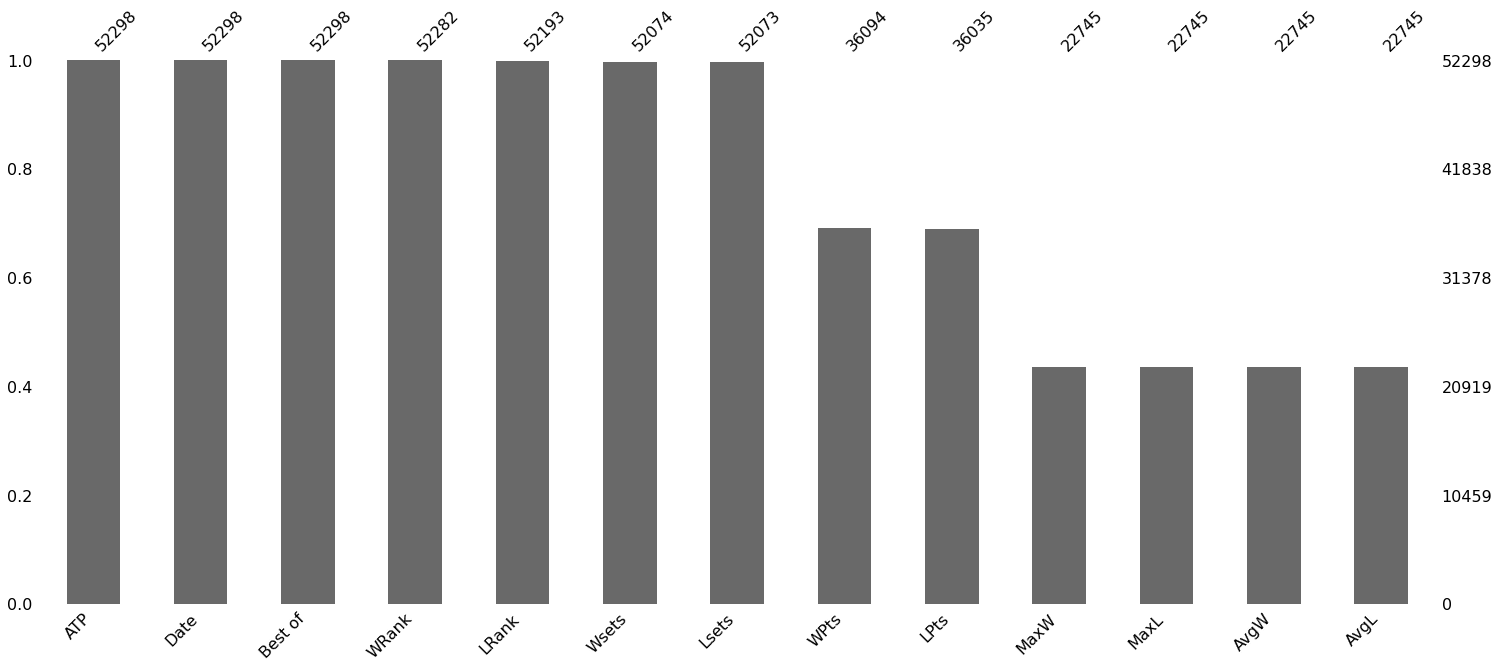

In [57]:
#the missing values of each variable
import missingno as msno
msno.bar(data_num)

In [58]:
# replacing the missing values of each varibale by the mean of the variable.
data_num["WRank"].replace(np.nan,data_num["WRank"].mean(),inplace=True)
data_num["LRank"].replace(np.nan,data_num["LRank"].mean(),inplace=True)
data_num["Wsets"].replace(np.nan,data_num["Wsets"].mean(),inplace=True)
data_num["Lsets"].replace(np.nan,data_num["Lsets"].mean(),inplace=True)
data_num["WPts"].replace(np.nan,data_num["WPts"].mean(),inplace=True)
data_num["LPts"].replace(np.nan,data_num["LPts"].mean(),inplace=True)
data_num["MaxW"].replace(np.nan,data_num["MaxW"].mean(),inplace=True)
data_num["MaxL"].replace(np.nan,data_num["MaxL"].mean(),inplace=True)
data_num["AvgW"].replace(np.nan,data_num["AvgW"].mean(),inplace=True)
data_num["AvgL"].replace(np.nan,data_num["AvgL"].mean(),inplace=True)

In [59]:
#like we see there is no missing values anymore.
data_num.isnull().sum()

ATP        0
Date       0
Best of    0
WRank      0
LRank      0
Wsets      0
Lsets      0
WPts       0
LPts       0
MaxW       0
MaxL       0
AvgW       0
AvgL       0
dtype: int64

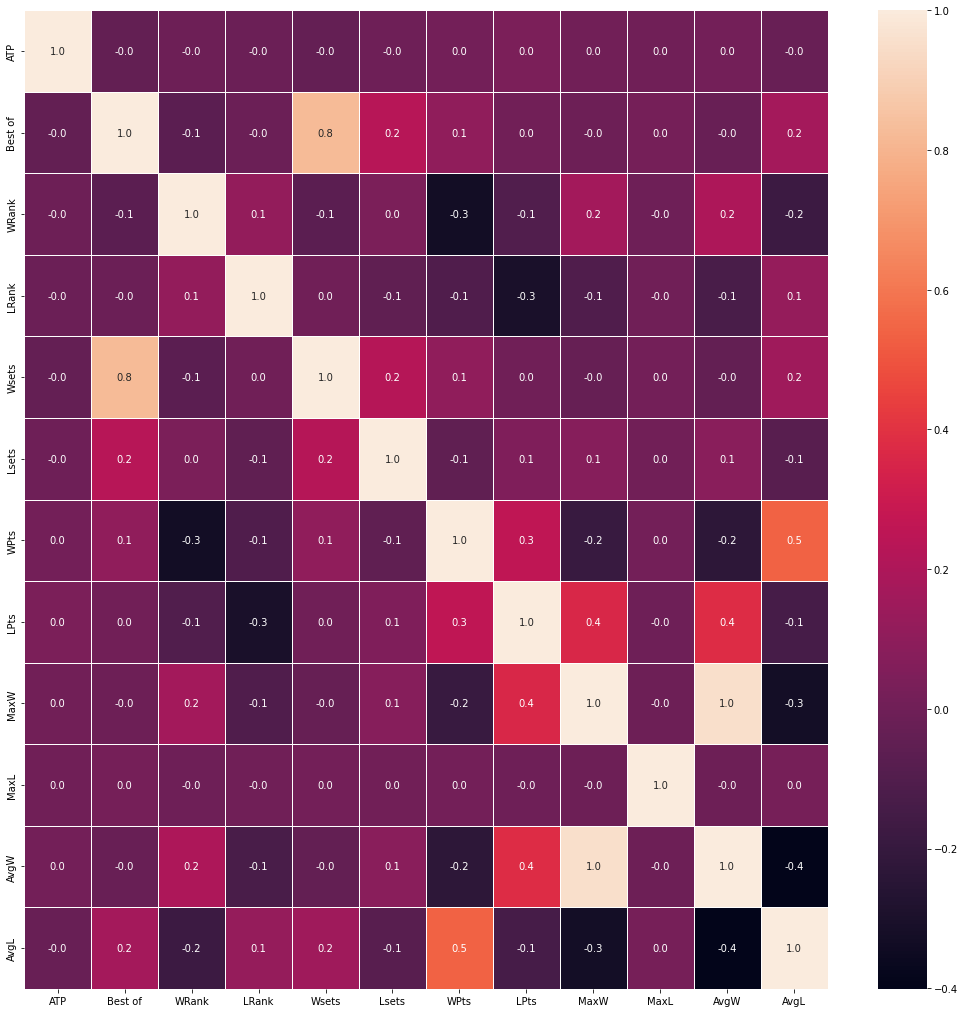

In [60]:
# the visualisation of matrice of correlation of our numerical data to determine the relationships between our variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [61]:
# the correlation between the variables AvgW and MaxW = 1.0 ,SO we will keep only one column between AvgW & MaxW.
# lets delete the column MaxW from our numerical dataset
data_num=data_num.drop(columns=['MaxW'])

array([[<AxesSubplot:title={'center':'ATP'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Best of'}>],
       [<AxesSubplot:title={'center':'WRank'}>,
        <AxesSubplot:title={'center':'LRank'}>,
        <AxesSubplot:title={'center':'Wsets'}>],
       [<AxesSubplot:title={'center':'Lsets'}>,
        <AxesSubplot:title={'center':'WPts'}>,
        <AxesSubplot:title={'center':'LPts'}>],
       [<AxesSubplot:title={'center':'MaxL'}>,
        <AxesSubplot:title={'center':'AvgW'}>,
        <AxesSubplot:title={'center':'AvgL'}>]], dtype=object)

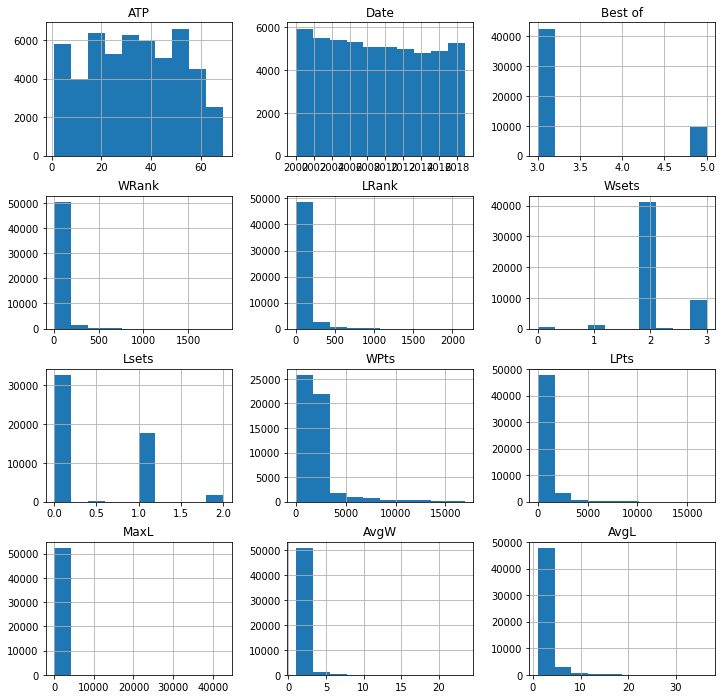

In [62]:
# just a look about the distributions of our numerical variables
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 12
data_num.hist()

### Handling the categorical data

In [63]:
data_categ.head()

,Location,Tournament,Series,Court,Surface,Round,Winner,Loser,Comment
0,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Dosedel S.,Ljubicic I.,Completed
1,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Enqvist T.,Clement A.,Completed
2,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Escude N.,Baccanello P.,Completed
3,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Federer R.,Knippschild J.,Completed
4,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Fromberg R.,Woodbridge T.,Completed


In [64]:
#No missing data
data_categ.isnull().sum()

Location      0
Tournament    0
Series        0
Court         0
Surface       0
Round         0
Winner        0
Loser         0
Comment       0
dtype: int64

In [65]:
data_categ.columns

Index(['Location', 'Tournament', 'Series', 'Court', 'Surface', 'Round',
       'Winner', 'Loser', 'Comment'],
      dtype='object')

### Feature Creation

The target variable will be not the winner's name, if so the problem would be a multi-classification task with an output taking labels from the names of all players, So to avoid this we will add 2 variables named 'player1' and 'player2' contain the names of the winner and the loser randomly.and finally we will add the target variable take values from (0,1)
 1 if the player1 is the winner and  0 if his the loser , thus we obtain a binary classification problem.

In [66]:
## adding the tow variables player1 and player2 contains the names of the winner and the loser of the match randomly
## adding the binary variable target that take 1 if the player1 is the winner and 0 if his the loser
data_categ[['Player1','Player2']] = data_categ[['Winner','Loser']]
np.random.seed(2)
target=np.random.randint(2,size=len(data_categ))
data_categ['target']=target
data_categ.loc[(target==0),'Player1'] , data_categ.loc[(target==0),'Player2'] = data_categ.loc[(target==0),'Player2'], data_categ.loc[(target==0),'Player1']

In [67]:
data_categ.head()

,Location,Tournament,Series,Court,Surface,Round,Winner,Loser,Comment,Player1,Player2,target
0,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Dosedel S.,Ljubicic I.,Completed,Ljubicic I.,Dosedel S.,0
1,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Enqvist T.,Clement A.,Completed,Enqvist T.,Clement A.,1
2,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Escude N.,Baccanello P.,Completed,Escude N.,Baccanello P.,1
3,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Federer R.,Knippschild J.,Completed,Knippschild J.,Federer R.,0
4,Adelaide,Australian Hardcourt Championships,International,Outdoor,Hard,1st Round,Fromberg R.,Woodbridge T.,Completed,Woodbridge T.,Fromberg R.,0


In [68]:
## concatenate the numerical and the categorical data to poursuit the preparation
import pandas as pd
data=pd.concat([data_num,data_categ],axis=1)
data.head()

,ATP,Date,Best of,WRank,LRank,Wsets,Lsets,WPts,LPts,MaxL,...,Series,Court,Surface,Round,Winner,Loser,Comment,Player1,Player2,target
0,1,2000-01-03,3,63.0,77.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,International,Outdoor,Hard,1st Round,Dosedel S.,Ljubicic I.,Completed,Ljubicic I.,Dosedel S.,0
1,1,2000-01-03,3,5.0,56.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,International,Outdoor,Hard,1st Round,Enqvist T.,Clement A.,Completed,Enqvist T.,Clement A.,1
2,1,2000-01-03,3,40.0,655.0,2.0,1.0,1831.891644,1047.544665,8.326076,...,International,Outdoor,Hard,1st Round,Escude N.,Baccanello P.,Completed,Escude N.,Baccanello P.,1
3,1,2000-01-03,3,65.0,87.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,International,Outdoor,Hard,1st Round,Federer R.,Knippschild J.,Completed,Knippschild J.,Federer R.,0
4,1,2000-01-03,3,81.0,198.0,2.0,1.0,1831.891644,1047.544665,8.326076,...,International,Outdoor,Hard,1st Round,Fromberg R.,Woodbridge T.,Completed,Woodbridge T.,Fromberg R.,0


In [86]:
#add the variable year
data['Year'] = data.Date.apply(lambda x : x.year)
data.columns

Index(['ATP', 'Date', 'Best of', 'WRank', 'LRank', 'Wsets', 'Lsets', 'WPts',
       'LPts', 'MaxL', 'AvgW', 'AvgL', 'Location', 'Tournament', 'Series',
       'Court', 'Surface', 'Round', 'Winner', 'Loser', 'Comment', 'Player1',
       'Player2', 'target', 'Year'],
      dtype='object')



Now We will add a variable named 'deffWins' represent the count of all times when player1 beated player2 minus the count of all times when player2 beated player1 before the year of the match (the actual year included)

In [104]:
# this function calculate the differnce between the count of all times when player1 beated player 2 ,and player2 beated player1 befor a year of the match
def diff_wins_past(player1,player2,Year):
    a=max(Year-1,2000)
    df=data[(a<data["Year"]) & (data["Year"]<=Year)].copy()[['Winner','Loser','Year']]
    a=df[(df["Winner"]==player1) & (df["Loser"]==player2)].value_counts().sum()
    b=df[(df["Winner"]==player2) & (df["Loser"]==player1)].value_counts().sum()
    return a-b

In [105]:
#application of this function on our data
data["diffWins"]=data.apply(lambda x: diff_wins_past(x['Player1'], x['Player2'],x['Year']), axis=1)

In [107]:
#the values taking by this varibale, like we see the maximum difference of wins is 7 (their are a player that won 7 time vs 0 time to the adversaire)
data["diffWins"].unique()

array([ 0, -1,  1, -2,  2, -3,  3,  4, -4,  6, -6, -5,  5, -7,  7],
      dtype=int64)

In [108]:
#just to have only positive values
data["diffWins"]=abs(data["diffWins"])

In [109]:
#Like we can see our variable has been successfully added
data.head()

,ATP,Date,Best of,WRank,LRank,Wsets,Lsets,WPts,LPts,MaxL,...,Surface,Round,Winner,Loser,Comment,Player1,Player2,target,Year,diffWins
0,1,2000-01-03,3,63.0,77.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,Hard,1st Round,Dosedel S.,Ljubicic I.,Completed,Ljubicic I.,Dosedel S.,0,2000,0
1,1,2000-01-03,3,5.0,56.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,Hard,1st Round,Enqvist T.,Clement A.,Completed,Enqvist T.,Clement A.,1,2000,0
2,1,2000-01-03,3,40.0,655.0,2.0,1.0,1831.891644,1047.544665,8.326076,...,Hard,1st Round,Escude N.,Baccanello P.,Completed,Escude N.,Baccanello P.,1,2000,0
3,1,2000-01-03,3,65.0,87.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,Hard,1st Round,Federer R.,Knippschild J.,Completed,Knippschild J.,Federer R.,0,2000,0
4,1,2000-01-03,3,81.0,198.0,2.0,1.0,1831.891644,1047.544665,8.326076,...,Hard,1st Round,Fromberg R.,Woodbridge T.,Completed,Woodbridge T.,Fromberg R.,0,2000,0




Now we will add tow variables named 'RankDiff' and 'PointDiff' represent respectivelly the Rank difference and the points differnce of our tow players

In [110]:
def RankDiff(data):
    target = "RankDiff"
    data[target] = data['WRank']-data['LRank']
    wonInd1 = (data['target'] == 0)             #The cases where p1=Loser and p2=Winner 
    data.loc[wonInd1,target] = data.loc[wonInd1,target].apply(lambda x : -x)
    

In [111]:
RankDiff(data)

In [112]:
def PointDiff(data):
    Wval, Lval = 'WPts', 'LPts'
    target = "PointsDiff"
    data[target] = data['WPts']-data['LPts']
    wonInd1 = (data['target'] == 0)           #The cases where p1=Loser and p2=Winner 
    data.loc[wonInd1,target] = data.loc[wonInd1,target].apply(lambda x : -x)

In [113]:
PointDiff(data)

In [114]:
data.head()

,ATP,Date,Best of,WRank,LRank,Wsets,Lsets,WPts,LPts,MaxL,...,Winner,Loser,Comment,Player1,Player2,target,Year,diffWins,RankDiff,PointsDiff
0,1,2000-01-03,3,63.0,77.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,Dosedel S.,Ljubicic I.,Completed,Ljubicic I.,Dosedel S.,0,2000,0,14.0,-784.346979
1,1,2000-01-03,3,5.0,56.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,Enqvist T.,Clement A.,Completed,Enqvist T.,Clement A.,1,2000,0,-51.0,784.346979
2,1,2000-01-03,3,40.0,655.0,2.0,1.0,1831.891644,1047.544665,8.326076,...,Escude N.,Baccanello P.,Completed,Escude N.,Baccanello P.,1,2000,0,-615.0,784.346979
3,1,2000-01-03,3,65.0,87.0,2.0,0.0,1831.891644,1047.544665,8.326076,...,Federer R.,Knippschild J.,Completed,Knippschild J.,Federer R.,0,2000,0,22.0,-784.346979
4,1,2000-01-03,3,81.0,198.0,2.0,1.0,1831.891644,1047.544665,8.326076,...,Fromberg R.,Woodbridge T.,Completed,Woodbridge T.,Fromberg R.,0,2000,0,117.0,-784.346979


### Data Modeling

In [115]:
data.columns

Index(['ATP', 'Date', 'Best of', 'WRank', 'LRank', 'Wsets', 'Lsets', 'WPts',
       'LPts', 'MaxL', 'AvgW', 'AvgL', 'Location', 'Tournament', 'Series',
       'Court', 'Surface', 'Round', 'Winner', 'Loser', 'Comment', 'Player1',
       'Player2', 'target', 'Year', 'diffWins', 'RankDiff', 'PointsDiff'],
      dtype='object')

In [130]:
## we delete the columns that we're not going to use for the prediction
df=data.drop(columns=['ATP','WRank','LRank','Wsets', 'Lsets', 'WPts','LPts', 'MaxL', 'AvgW', 'AvgL','Winner', 'Loser'])

In [117]:
#those are the variables that we're going to use to make predictions
df.columns

Index(['Date', 'Best of', 'Location', 'Tournament', 'Series', 'Court',
       'Surface', 'Round', 'Comment', 'Player1', 'Player2', 'target', 'Year',
       'diffWins', 'RankDiff', 'PointsDiff'],
      dtype='object')

In [131]:
# to seperate the training set and the test set
Test = lambda x: x.year == 2017
Train = lambda x: x.year < 2017
test_ind = df['Date'].apply(gTest)
train_ind = df['Date'].apply(gTrain)
usedColumns=['Date', 'Best of', 'Location', 'Tournament', 'Series', 'Court','Surface', 'Round', 'Comment', 'Player1', 'Player2', 'target', 'Year','diffWins','RankDiff', 'PointsDiff']

In [132]:
#store the training and the test set
data_train = df.loc[train_ind, usedColumns].copy()
data_test = df.loc[test_ind, usedColumns].copy()

In [133]:
#we delete the variable Date cause we already have the variable Year and also the predictions will by year
data_train=data_train.drop(columns=["Date"])
data_test=data_test.drop(columns=["Date"])

In [134]:
#we split the data into training and testing sets
Y_train=data_train['target']
Y_test=data_test["target"]
X_train=data_train.drop(columns=["target"])
X_test=data_test.drop(columns=["target"])

Now  We will separate categorical and numerical variables using their data types to identify them, the type object corresponds to categorical columns (strings). We make use of make_column_selector helper to select the corresponding columns. after that we will apply some preprocessing steps on numerical and categorical data using ColumnTransformer

In [135]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

Now let's create the preprocessors for the numerical and categorical parts.

-one-hot encoding will be applied to categorical columns. Besides, we use handle_unknown="ignore" to solve the potential issues due to rare categories.
-numerical scaling numerical features which will be standardized.

In [124]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

Now, we create the transformer and associate each of these preprocessors with their respective columns.

In [125]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

### Logistic Regression

We build a pipline that contain the preprocessor and the logistic model as we can see in the next cell

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(C=1, penalty='l1', solver='liblinear'))

In [168]:
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'Tournament',
                                                   'Series', 'Court', 'Surface',
                                                   'Round', 'Comment',
                                                   'Player1', 'Player2']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Best of', 'Year',
                                                   'diffWins', 'RankDiff',
                                                   'PointsDiff'])])),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [169]:
_ = model.fit(X_train, Y_train)

In [170]:
model.score(X_test, Y_test)

0.6478178368121442

In [183]:
# the generalization performance of the model via cross-validation.
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X_train, Y_train)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Accuracy score via cross-validation:
0.719 ± 0.073


### Hyperparametres tuning of LogisticRegresion by RandomizedSearch

In [184]:

from sklearn.model_selection import RandomizedSearchCV
max_iter = range(100, 600)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 2, 0.01)
random_grid ={
    'logisticregression__max_iter' : max_iter,
    'logisticregression__warm_start' : warm_start,
    'logisticregression__solver' : solver,
    'logisticregression__C' : C,
}

In [185]:
random_estimator = RandomizedSearchCV(estimator = model,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )

random_estimator.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('one-hot-encoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Location',
                                                                                'Tournament',
                                                                                'Series',
                                                                                'Court',
                                                                                'Surface',
                                                                                'Round',
                                                                                'Comment',
                                                                                'Player1',
                                                                                'Player2']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['Best '
                                                                                'of',
                                                                                'Year',
                                                                                'diffWins',
                                                                                'RankDiff',
                                                                                'PointsDiff'])])),
                                             ('logis...
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99]),
                                        'logisticregression__max_iter': range(100, 600),
                                        'logisticregression__solver': ['lbfgs',
                                                                       'newton-cg',
                                                                       'liblinear'],
                                        'logisticregression__warm_start': [True,
                                                                           False]},
                   random_state=1, scoring='accuracy', verbose=1)

In [190]:
## those are the best parameters founded by the randomGridsearchCV
random_estimator.best_params_

{'logisticregression__warm_start': True,
 'logisticregression__solver': 'liblinear',
 'logisticregression__max_iter': 285,
 'logisticregression__C': 0.09}